<a href="https://colab.research.google.com/github/Srivathshan-Paramalingam-0505/Team_zoom_coding_challenge/blob/main/Copy_Project_guidelines_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder) 
- code (folder) 
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (optional but useful). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [1]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# install Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### IMPORTANT
Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file. Save it in your Google Drive (not in a folder, in your general drive).

In [3]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Coding_Challenge/kaggle.json ~/.kaggle/kaggle.json


cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
#!unzip "detecting-french-texts-difficulty-level-2022.zip" -d data

In [6]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import spacy
from spacy import displacy
sns.set_style("whitegrid")

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Data importations

In [7]:
# read in your training data
import pandas as pd
import numpy as np

df = pd.read_csv('drive/MyDrive/Coding_Challenge/training_data.csv')

In [8]:
df.shape

(4800, 3)

In [9]:
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

- We will not use the code below since we need to report the result with the difficulty not encoded

In [10]:
#Ordinal encode the difficulty
#oe = OrdinalEncoder()
#oe.set_params(categories = [['A1','A2','B1','B2','C1','C2']])#0 = A1, 1 = A2,...

#fit_transform my column
#df['difficulty'] = oe.fit_transform(df[['difficulty']]).astype('int')
#df

Have a look at the data on which to make predictions.

In [11]:
df_pred = pd.read_csv('drive/MyDrive/Coding_Challenge/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [12]:
pred_sentence = df_pred['sentence']

And this is the format for your submissions.

In [13]:
df_example_submission = pd.read_csv('drive/MyDrive/Coding_Challenge/sample_submission.csv')
df_example_submission.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem?

In [14]:
np.random.seed = 0

In [113]:
# your code here (you can use as many lines of code as you like)
base_rate = (df['difficulty'].value_counts() / len(df)).max()
print ("The base rate is", base_rate)

The base rate is 0.169375


#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [16]:
#We select our independant and dependant features
X = df['sentence']
y = df['difficulty']

In [17]:
#Split the dataset to have a representative amount of train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
#Define a model AND apply vectorizer
LR = LogisticRegression()

In [19]:
# Using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1))
# Create a pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', LR)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [20]:
X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

Calculate accuracy, precision, recall and F1 score on the test set.

In [94]:
#function to calculate metrics of the models and display a confusion matrix
def models_metrics (true, pred):
  precision = precision_score(true, pred, average='weighted')
  recall = recall_score(true, pred, average='weighted')
  f1 = f1_score(true, pred, average='weighted')
  accuracy = accuracy_score(true,pred)
  conf_mat = confusion_matrix(true, pred)
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  print(f"ACCURACY SCORE:\n{accuracy:.4f}")
  print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")
  return precision, recall, f1, accuracy

In [22]:
y_pred_lr = pipe.predict(X_test)

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

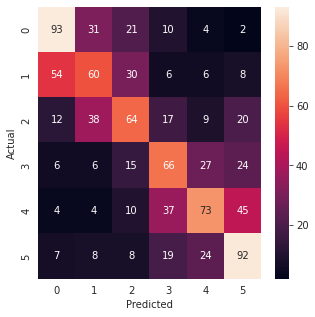

ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4656
	Recall: 0.4667
	F1_Score: 0.4640


In [95]:
precision_lr, recall_lr, f1_lr, accuracy_lr = models_metrics(y_test,y_pred_lr)

We can see that A1 and C2 have the most well classified sentences.
On the other hand, we see the opposite if we take for example the A2 level sentences :
- 54 sentences are classified as A1 instead of A2

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

- <font color = 'red'>Submission of Logistic regression

In [26]:
unlabelled_lr=pipe.predict(pred_sentence)

In [27]:
#Determine the different metrics for the unlabelled data
unlabelled_lr

array(['C2', 'A2', 'A1', ..., 'C2', 'C1', 'B2'], dtype=object)

In [28]:
df_pred_submit = df_pred.copy()
df_pred_submit['difficulty']=unlabelled_lr #to modify when using another classification model
df_pred_submit =df_pred_submit.drop('sentence',axis=1)


In [29]:
df_pred_submit

,id,difficulty
0,0,C2
1,1,A2
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,C2
1196,1196,A2
1197,1197,C2
1198,1198,C1


In [ ]:
#for the submission part: 
from google.colab import files
df_pred_submit.to_csv('teamzoom_submit.csv', encoding ='utf-8-sig',index=False) 
files.download('teamzoom_submit.csv')

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [31]:
#import the KNN model
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [32]:
# your code here
# Using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1))
# Create a pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [33]:
#predict on our test set with the knn model
y_pred_knn=pipe.predict(X_test)

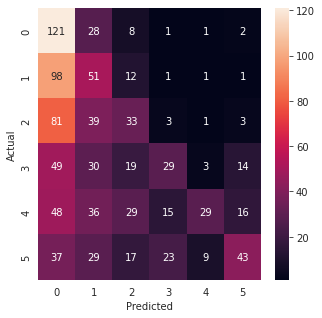

ACCURACY SCORE:
0.3187
CLASSIFICATION REPORT:
	Precision: 0.4030
	Recall: 0.3187
	F1_Score: 0.3022


In [96]:
#how good is the KNN model ?
precision_knn, recall_knn, f1_knn, accuracy_knn = models_metrics(y_test,y_pred_knn)

Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [35]:
# let's do our grid search to define which hyperparameters we should get
from sklearn.model_selection import GridSearchCV
#set the search
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy', return_train_score = False, verbose = 1)
pipe=Pipeline([('vectorizer', tfidf),
                 ('classifier', knn_cv)])
pipe.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19]},
                              scoring='accuracy', verbose=1))])

In [36]:
#predict on our test set with the knn model with hyper parameters
y_pred_knn_cv=pipe.predict(X_test)

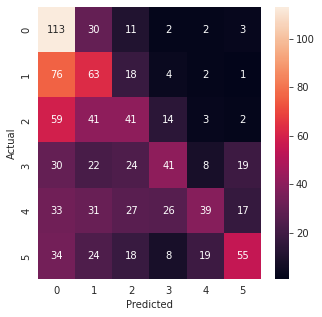

ACCURACY SCORE:
0.3667
CLASSIFICATION REPORT:
	Precision: 0.4094
	Recall: 0.3667
	F1_Score: 0.3576


In [97]:
#how good is the KNN model with GridSearchCV ?
precision_knn_cv, recall_knn_cv, f1_knn_cv, accuracy_knn_cv = models_metrics(y_test,y_pred_knn_cv)

After having defined a Grid Search, we can see there is a little improvement
- Below are the best parameter found by the model after cross validation

In [39]:
# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", round(knn_cv.best_score_, 4))

Hyperparameters: {'n_neighbors': 1}
Train Score: 0.3378


Let's determine the predictions for the unlabelled dataset (without tuning)

In [40]:
unlabelled_knn=pipe.predict(df_pred['sentence'])

In [41]:
unlabelled_knn

array(['C2', 'B1', 'A1', ..., 'C2', 'C1', 'C1'], dtype=object)

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [42]:
# import the DecisionTree model
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=10,random_state=50)

In [43]:
#train the model:
tfidf = TfidfVectorizer(ngram_range=(1,1))
# Create a pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=50))])

In [44]:
#predict on our test set
y_pred_decision=pipe.predict(X_test)

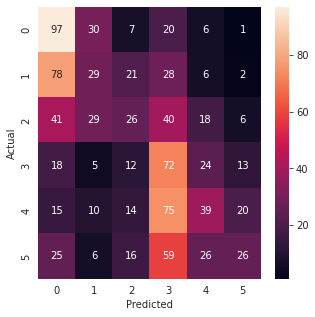

ACCURACY SCORE:
0.3010
CLASSIFICATION REPORT:
	Precision: 0.3087
	Recall: 0.3010
	F1_Score: 0.2803


In [101]:
#How good is the DecisionTree model
precision_tree, recall_tree, f1_tree, accuracy_tree = models_metrics(y_test,y_pred_decision)

Let's predict on our unlabelled dataset(without tuning)

In [46]:
unlabelled_decision=pipe.predict(df_pred['sentence'])

In [47]:
unlabelled_decision

array(['C2', 'B1', 'A1', ..., 'C2', 'A1', 'B2'], dtype=object)

#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [49]:
#import the new model
from sklearn.ensemble import RandomForestClassifier
Randfor=RandomForestClassifier(n_estimators=500)

In [50]:
tfidf = TfidfVectorizer(ngram_range=(1,1))

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', Randfor)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=500))])

In [51]:
#predict on our test set
y_pred_randfor=pipe.predict(X_test)

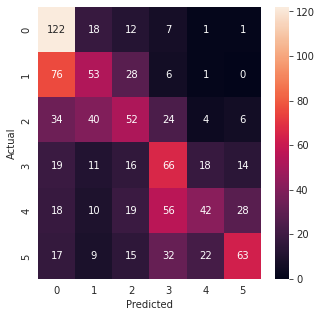

ACCURACY SCORE:
0.4146
CLASSIFICATION REPORT:
	Precision: 0.4272
	Recall: 0.4146
	F1_Score: 0.4022


In [102]:
precision_randfor, recall_randfor, f1_randfor, accuracy_randfor = models_metrics(y_test,y_pred_randfor)

In [53]:
unlabelled_randfor=pipe.predict(df_pred['sentence'])

In [54]:
unlabelled_randfor

array(['A1', 'B1', 'A1', ..., 'C2', 'A1', 'A1'], dtype=object)

In [55]:
Randfor2=RandomForestClassifier()

In [56]:
Randfor2.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [98]:
param_grid={'n_estimators': [200, 500], 'criterion': ['gini', 'entropy'], 'max_features' : ['sqrt', 'log2']}
randfor_cv = GridSearchCV(Randfor2, param_grid, cv=5, scoring = 'accuracy', return_train_score = False, verbose = 1)
pipe=Pipeline([('vectorizer', tfidf),                ('classifier', randfor_cv)])
pipe.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_features': ['sqrt', 'log2'],
                                          'n_estimators': [200, 500]},
                              scoring='accuracy', verbose=1))])

- We will display the best parameter of the model above

In [104]:
# Print results
print("Hyperparameters:", randfor_cv.best_params_)
print("Train Score:", round(randfor_cv.best_score_, 4))

Hyperparameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 500}
Train Score: 0.4331


In [99]:
y_pred_randfor_param=pipe.predict(X_test)

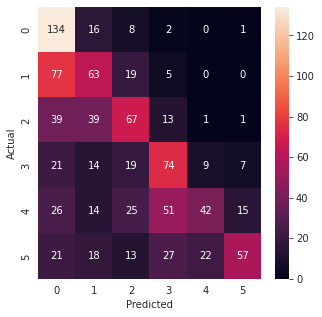

ACCURACY SCORE:
0.4552
CLASSIFICATION REPORT:
	Precision: 0.4929
	Recall: 0.4552
	F1_Score: 0.4413


In [115]:
precision_randfor_tuned, recall_randfor_tuned, f1_randfor_tuned, accuracy_randfor_tuned = models_metrics(y_test,y_pred_randfor_param)

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

### We will try to use spacy to tokenize the entire sentences
Although we will do further analysis in our Tokenizer notebook

In [58]:
!python -m spacy download fr_core_news_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-21 15:32:13.961302: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.3 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [59]:
# Load French language model
sp = spacy.load('fr_core_news_sm')

In [60]:
doc = sp(df.iloc[71,1])
doc

Largué par la sonde européenne Rosetta, le petit robot avait atterri mercredi en fin d'après-midi sur le noyau de la comète Tchourioumov-Guérassimenko, une première de l'histoire spatiale.

In [61]:
import string
punctuations= string.punctuation
space= string.whitespace

In [62]:
#Import stopwords from French language
spacy_stopwords = spacy.lang.fr.stop_words.STOP_WORDS
print(list(spacy_stopwords)[:10])

['o', 'apres', 'seulement', 'quatrième', 'seraient', 'après', 'delà', 'antérieure', 'derriere', 'maintenant']


That function will remove stop words and punctations

In [63]:
def spacy_tokenizer(sentence):
  mytokens = sp(sentence)
  mytokens = [ word for word in mytokens if (word.is_stop==False) and (word.is_punct==False)]
  return mytokens

In [64]:
sp_test = spacy_tokenizer(doc)
sp_test

[Largué,
 sonde,
 européenne,
 Rosetta,
 petit,
 robot,
 atterri,
 mercredi,
 fin,
 après-midi,
 noyau,
 comète,
 Tchourioumov,
 Guérassimenko,
 histoire,
 spatiale]

In [66]:
def clean_punct (series):
  clean_sentence = []
  for i in range (3840):
    clean_sentence.append(series.iloc[i].translate(str.maketrans('', '', string.punctuation)))
  return clean_sentence

- <b>Logistic regression with clean data

In [70]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,1))

In [74]:
# Create pipeline
pipe_lr = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', LR)])

# Fit model on training set
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7efb55ebfdc0>)),
                ('classifier', LogisticRegression())])

In [75]:
y_pred_lr2=pipe_lr.predict(X_test)

With the prediction, we already see that our model don't predict well our sentences

In [76]:
y_pred_lr2 #don't work well

array(['A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
       'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


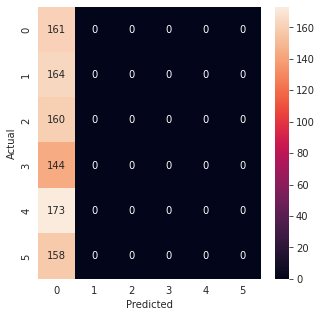

ACCURACY SCORE:
0.1677
CLASSIFICATION REPORT:
	Precision: 0.0281
	Recall: 0.1677
	F1_Score: 0.0482


In [105]:
precision_lr_clean, recall_lr_clean, f1_lr_clean, accuracy_lr_clean = models_metrics(y_test,y_pred_lr2)

- <b> SVC with clean data

In [78]:
from sklearn.svm import SVC
svc = SVC(gamma="scale", random_state=42)

In [106]:
# Create pipeline
pipe_svc = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', svc)])

# Fit model on training set
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7efb55ebfdc0>)),
                ('classifier', SVC(random_state=42))])

In [109]:
y_pred_svc=pipe_svc.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


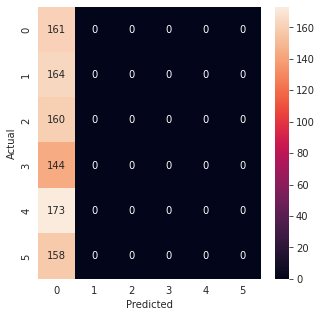

ACCURACY SCORE:
0.1677
CLASSIFICATION REPORT:
	Precision: 0.0281
	Recall: 0.1677
	F1_Score: 0.0482


In [110]:
precision_svc, recall_svc, f1_svc, accuracy_svc = models_metrics(y_test,y_pred_svc)

As we can see, we found a base_line result, showing us our spacy tokenizer don't work at all. That's why we'll figure out another way to do that operation in our next notebook.

### Here we test the voting classifier which will aggregate the result of our different classifiers

In [82]:
# Combining models
from sklearn.ensemble import VotingClassifier

# The ensemble is a voting classifier that aggregates our models
voting_clf = VotingClassifier(estimators=[('svm', svc), ('tree', tree), ('log', LR), ('knn', knn_cv), ('rfc', Randfor
)], 
                             voting='hard')

# Create pipeline
pipe_multiple = Pipeline([('vectorizer', tfidf),
                 ('classifier', voting_clf)])

# Fit model on training set
pipe_multiple.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 VotingClassifier(estimators=[('svm', SVC(random_state=42)),
                                              ('tree',
                                               DecisionTreeClassifier(max_depth=10,
                                                                      random_state=50)),
                                              ('log', LogisticRegression()),
                                              ('knn',
                                               GridSearchCV(cv=5,
                                                            estimator=KNeighborsClassifier(),
                                                            param_grid={'n_neighbors': [1,
                                                                                        2,
                                                                                        3,
                                                 

In [83]:
y_pred_multiple=pipe_multiple.predict(X_test)

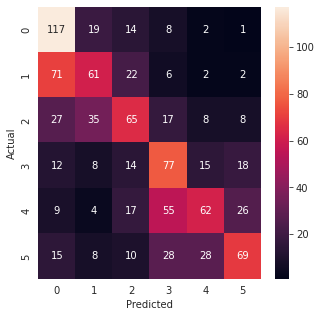

ACCURACY SCORE:
0.4698
CLASSIFICATION REPORT:
	Precision: 0.4792
	Recall: 0.4698
	F1_Score: 0.4633


In [111]:
precision_voting_classifier, recall_voting_classifier, f1_voting_classifier, accuracy_voting_classifier = models_metrics(y_test,y_pred_multiple)

- As we can see, it improves a little bit the accuracy compared to individual cases of classifier

- <font color = 'red'> Submission of our result

In [85]:
df_pred_submit_multiple = df_pred.copy()

In [86]:
unlabelled_multiple=pipe_multiple.predict(df_pred_submit_multiple['sentence'])
unlabelled_multiple

array(['C2', 'B1', 'A1', ..., 'C2', 'A1', 'B2'], dtype=object)

In [87]:
df_pred_submit_multiple['difficulty']=unlabelled_multiple #to modify when using another classification model
df_pred_submit_multiple =df_pred_submit_multiple.drop('sentence',axis=1)

In [88]:
#for the submission part: 
from google.colab import files
df_pred_submit_multiple.to_csv('teamzoom_submit.csv', encoding ='utf-8-sig',index=False) 
files.download('teamzoom_submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 4.7. Show a summary of your results

In [117]:
# Creation of a DataFrame showing our different metrics results
metrics = {'Model' : ['Logistic Regression', 'K nearest neighbour', 'knn with cv','Tree classifier', 'Random forest', 'Random forest tuned', 'LR cleaned','Support vector classification (SVC) cleaned', 'Voting classifier (not cleaned)'], 
           'Base_rate' : [base_rate, base_rate, base_rate, base_rate, base_rate, base_rate, base_rate, base_rate, base_rate],
           'Accuracy' : [accuracy_lr, accuracy_knn, accuracy_knn_cv, accuracy_tree, accuracy_randfor, accuracy_randfor_tuned, accuracy_lr_clean, accuracy_svc, accuracy_voting_classifier],
           'Precision' : [precision_lr, precision_knn, precision_knn_cv, precision_tree, precision_randfor, precision_randfor_tuned, precision_lr_clean, precision_svc, precision_voting_classifier],
           'Recall' : [recall_lr, recall_knn, recall_knn_cv, recall_tree, recall_randfor, recall_randfor_tuned, recall_lr_clean, recall_svc, recall_voting_classifier],
           'F1 score' : [f1_lr, f1_knn, f1_knn_cv, f1_tree, f1_randfor, f1_randfor_tuned, f1_lr_clean, f1_svc, f1_voting_classifier]}
df_comparison = pd.DataFrame(data = metrics)
df_comparison

,Model,Base_rate,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.169375,0.466667,0.465560,0.466667,0.463997
1,K nearest neighbour,0.169375,0.318750,0.403045,0.318750,0.302166
2,knn with cv,0.169375,0.366667,0.409431,0.366667,0.357614
3,Tree classifier,0.169375,0.301042,0.308685,0.301042,0.280264
4,Random forest,0.169375,0.414583,0.427206,0.414583,0.402220
5,Random forest tuned,0.169375,0.455208,0.492879,0.455208,0.441312
6,LR cleaned,0.169375,0.167708,0.028126,0.167708,0.048173
7,Support vector classification (SVC) cleaned,0.169375,0.167708,0.028126,0.167708,0.048173
8,Voting classifier (not cleaned),0.169375,0.469792,0.479206,0.469792,0.463251
